# Standard error

Philipp Schlatter, LSTM FAU, 2024

Run in Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/UA/error.ipynb

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # for Google Colab and interative figures
  !pip install -q ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,t,norm

π = mt.pi

## Standard error of the mean

The standard error of the mean $\hat{\mu}$ is typically calculated as 
$$\sigma_{\hat{\mu}} = \frac{\sigma_x}{\sqrt{n}} \ .$$
This expression can be obtained by considering the sum of all observations,
$$T = \sum_{i=1}^n x_i$$
which then allows to find the sample mean $\hat\mu = T/n$ (which converges to the population mean due to the LLN). We know  the variance of the observations $\mathbb{V}[x_i]=\sigma^2$ (or rather, we can approximate it by $s^2$). The variance of the sum is $\mathbb{V}[T]= n \sigma^2$ since we assume no crosscorrleation between the observations (iid). Now, it directly follows,
$$\sigma^2_{\hat{\mu}}=\mathbb{V}[\hat\mu] = \mathbb{V}[T/n] = (1/n^2)\mathbb{V}[T] = n\sigma^2/n^2 = \frac{\sigma^2}{n} , $$
and with that 
$$\sigma_{\hat{\mu}} = \frac{\sigma_x}{\sqrt{n}} \ .$$

### Non-overlapping batch method

An estimate of the confidence interval (CI) of the mean $\hat{\mu}$ can be obtained from the population variance and number of batches. This is the so-called non-overlapping batch method (NOBM). Recall that the batch means $\overline{x}_i$ are normally distributed with mean $\hat{\mu}$ and variance $\hat{\sigma}$. With $M$ batches and corresponding batch means $\overline{x}_m$:
$$\sigma^2_{nobm} = \frac{s^2}{M} = \frac{1}{M(M-1)} \sum_{m=1}^{M} (\overline{x}_m-\hat{\mu})^2, $$
and the confidence interval CI
$$ CI=\sqrt{\sigma^2_{nobm}} \cdot 1.96 \ .$$

In [3]:
# Non-overlapping batch means. 
# M number of batches, NN batch size, N total number of realisations drawn 

M=1000; NN=500; 

# create the random variables
mu, sigma = 1, 2 # mean and standard deviation
mu, sigma = 5, 2.5 # mean and standard deviation

N=M*NN;
s = np.random.normal(mu, sigma, N)
s = mu+np.sqrt(12)*sigma*(np.random.random_sample((N,))-0.5)

In [4]:
smean = np.zeros(M)
svar = np.zeros(M)
for i in range(M):
    ss = s[i*NN:(i+1)*NN]   # this is batch i
    smean[i] = np.mean(ss)
    svar[i] = np.var(ss)

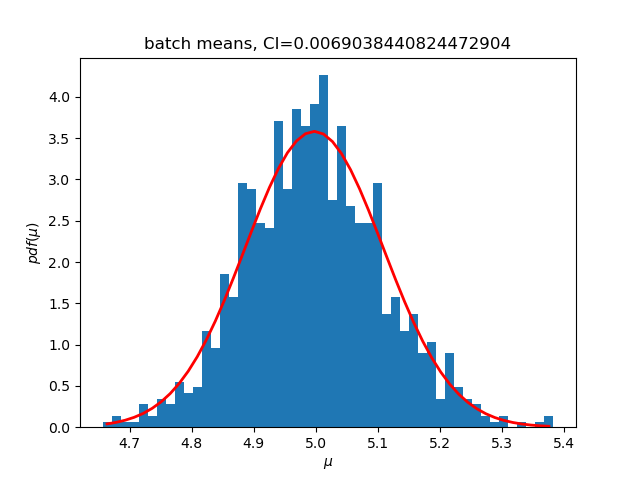

In [5]:
plt.figure()
nbins = 50
count, bins, ignored = plt.hist(smean, nbins, density=True)
bcc = (bins[0:-1]+bins[1:])/2 
bmu = np.mean(smean)
bsigma = np.std(smean,ddof=1)
plt.plot(bcc, norm.pdf(bcc,bmu, bsigma), linewidth=2, color='r')
plt.xlabel('$\mu$');plt.ylabel('$pdf(\mu)$')
plt.title('batch means, CI='+str(bsigma/np.sqrt(M)*1.96))
plt.show()

In [6]:
'Sampling: ',bmu,bsigma**2  # non-biased

('Sampling: ', 4.997589696800178, 0.012407086400130798)

In [7]:
"Reference: ",mu,sigma**2/NN         # only if iid

('Reference: ', 5, 0.0125)

In [8]:
bsigma/np.sqrt(M)*1.96

0.0069038440824472904

In [9]:
np.sqrt(1/M/(M-1)*np.sum( (smean-bmu)**2))*1.96

0.0069038440824472904

In [10]:
1.96*sigma/np.sqrt(NN*M)   # only if iid, just count all samples drawn

0.006929646455628166

In [11]:
print('Mean μ=%8.6f +/- %8.6f ' % (bmu,bsigma/np.sqrt(M)*1.96))

Mean μ=4.997590 +/- 0.006904 
